<a href="https://colab.research.google.com/github/hvr2026/Advanced-Dimensionality-Reduction/blob/main/Demonstration%20of%20Dimensionality%20Reduction/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn tensorflow lottie datashader plotly scikit-learn matplotlib pandas seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.3/171.3 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.7 MB/s eta 0:00:00
  Created wheel for lottie: filename=lottie-0.7.1-py3-none-any.whl size=194862 sha256=6e266859823acc38cd1209257e6fd0b1f109a51e1de120be3c38b4cc07afc870
  Stored in directory: /root/.cache/pip/wheels/b2/80/e9/c6d8a95c6308e98d72f876e3e5e6dca882ea0581c744051e47
Successfully built lottie


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap, MDS
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from umap import UMAP
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model

In [3]:
# Generate a custom dataset (replace this with your dataset)
from sklearn.datasets import make_blobs

In [4]:
n_samples = 2000
n_features = 10
n_classes = 5
data, labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_classes, random_state=42)

In [5]:
# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [6]:
# Convert data to a Pandas DataFrame for convenience
df = pd.DataFrame(data_scaled, columns=[f"Feature {i+1}" for i in range(n_features)])
df['Label'] = labels

In [34]:
# Visualize original dataset
px.scatter_3d(df, x='Feature 1', y='Feature 2', z='Feature 3', color=df['Label'].astype(str),
              title="Original Dataset (First 3 Features)").show()


In [8]:
# Split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, labels, test_size=0.2, random_state=42)


In [15]:
def plot_2d_projection(data_reduced, labels, title):
    fig = px.scatter(x=data_reduced[:, 0], y=data_reduced[:, 1], color=labels.astype(str), title=title)
    fig.update_layout(xaxis_title="Component 1", yaxis_title="Component 2")
    fig.show()


In [41]:
# 1. Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
X_lle = lle.fit_transform(X_train)
plot_2d_projection(X_lle, y_train, "LLE Dimensionality Reduction")

In [36]:
# 2. t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_train)
plot_2d_projection(X_tsne, y_train, "t-SNE Dimensionality Reduction")

In [37]:
# 3. ISOMAP
isomap = Isomap(n_neighbors=10, n_components=2)
X_isomap = isomap.fit_transform(X_train)
plot_2d_projection(X_isomap, y_train, "ISOMAP Dimensionality Reduction")

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning:

The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more effi

In [38]:
# 4. UMAP
umap_reducer = UMAP(n_neighbors=10, n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_train)
plot_2d_projection(X_umap, y_train, "UMAP Dimensionality Reduction")

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [39]:
# 5. Multidimensional Scaling (MDS)
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_train)
plot_2d_projection(X_mds, y_train, "MDS Dimensionality Reduction")

In [40]:
# 6. Randomized PCA
random_pca = PCA(n_components=2, svd_solver='randomized', random_state=42)
X_random_pca = random_pca.fit_transform(X_train)
plot_2d_projection(X_random_pca, y_train, "Randomized PCA Dimensionality Reduction")

In [42]:
# 7. Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
X_kernel_pca = kernel_pca.fit_transform(X_train)
plot_2d_projection(X_kernel_pca, y_train, "Kernel PCA Dimensionality Reduction")

In [43]:
# 8. Incremental PCA
incremental_pca = IncrementalPCA(n_components=2)
X_incremental_pca = incremental_pca.fit_transform(X_train)
plot_2d_projection(X_incremental_pca, y_train, "Incremental PCA Dimensionality Reduction")

In [44]:
# 9. Factor Analysis
factor_analysis = FactorAnalysis(n_components=2)
X_fa = factor_analysis.fit_transform(X_train)
plot_2d_projection(X_fa, y_train, "Factor Analysis Dimensionality Reduction")

In [25]:

# 10. Autoencoders
input_dim = X_train.shape[1]

In [26]:
# Define the Autoencoder model
def create_autoencoder(input_dim, encoding_dim=2):
    # Encoder
    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(128, activation='relu')(input_layer)
    encoded = layers.Dense(64, activation='relu')(encoded)
    bottleneck = layers.Dense(encoding_dim, activation='relu')(encoded)  # Bottleneck
    # Decoder
    decoded = layers.Dense(64, activation='relu')(bottleneck)
    decoded = layers.Dense(128, activation='relu')(decoded)
    decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)
    # Models
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, bottleneck)
    return autoencoder, encoder

In [27]:
autoencoder, encoder = create_autoencoder(input_dim)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.2207
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9748
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8459
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7686 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7269 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6431 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6108 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6047 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6054 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6027 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6151 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6033 
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6061 
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6035 
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6094
Epoch 16

In [ ]:
# Use encoder for dimensionality reduction
X_autoencoder = encoder.predict(X_train)
plot_2d_projection(X_autoencoder, y_train, "Autoencoder Dimensionality Reduction")

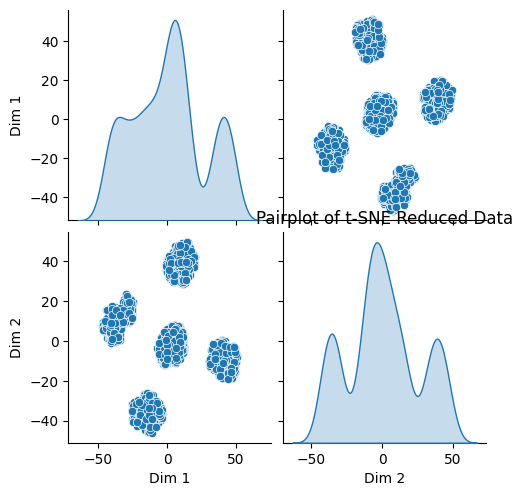

In [28]:
# 1. Pairplot of t-SNE reduced data
sns.pairplot(pd.DataFrame(X_tsne, columns=['Dim 1', 'Dim 2']), diag_kind='kde')
plt.title("Pairplot of t-SNE Reduced Data")
plt.show()

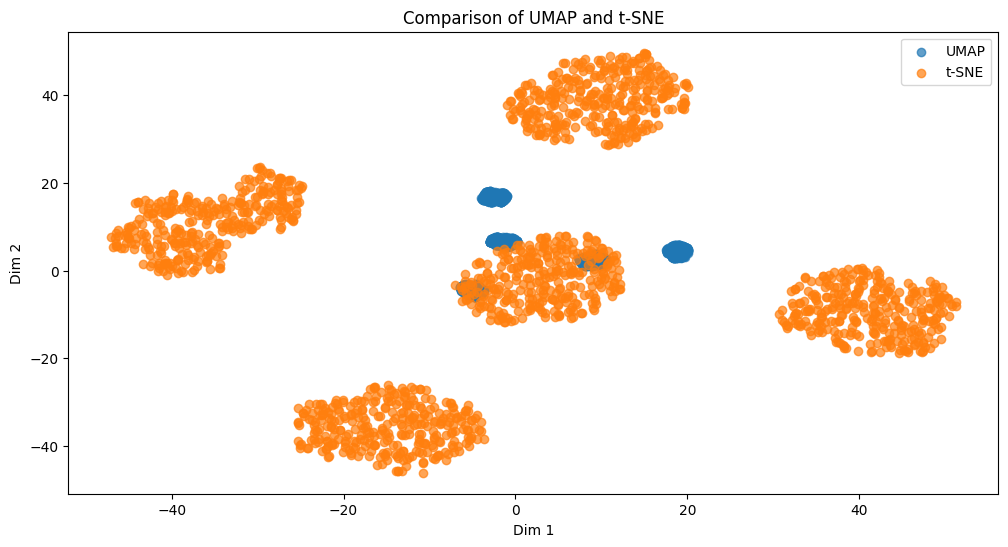

In [29]:
# 2. Comparison of UMAP and t-SNE
plt.figure(figsize=(12, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], label="UMAP", alpha=0.7)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label="t-SNE", alpha=0.7)
plt.title("Comparison of UMAP and t-SNE")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend()
plt.show()

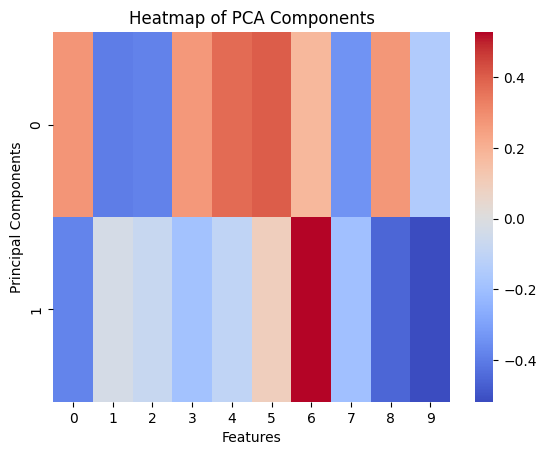

In [30]:
# 3. Heatmap of PCA components
sns.heatmap(random_pca.components_, cmap='coolwarm', annot=False)
plt.title("Heatmap of PCA Components")
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.show()

In [32]:
# 4. 3D Visualization with UMAP
umap_reducer_3d = UMAP(n_neighbors=10, n_components=3, random_state=42)
X_umap_3d = umap_reducer_3d.fit_transform(X_train)
fig = px.scatter_3d(x=X_umap_3d[:, 0], y=X_umap_3d[:, 1], z=X_umap_3d[:, 2], color=y_train.astype(str))
fig.update_layout(title="3D UMAP Visualization")
fig.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train classifier on reduced data (e.g., UMAP)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_umap, y_train)
y_pred = clf.predict(X_umap)

print("Classification Report (UMAP):\n", classification_report(y_train, y_pred))

Classification Report (UMAP):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       325
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       314
           4       1.00      1.00      1.00       329

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

